In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
class Read:
    
    '''This class is for reads extracted from fastq files.'''
    
    def __init__(self, sq, quality, name):
        
        '''Initializes a read with a nt sequence, 
        a quality string, and a read name.'''
        
        self.nt = sq
        self.quality = quality
        self.name = name
        self.length = len(self.nt)
        
    def revcomp(self,inplace=True):
        
        '''This function returns reverse compliment of the input sequence.'''
    
        revcomp_sq=''
        compdict={'A':'T','T':'A','C':'G','G':'C'}
        for nt in self.nt[::-1]:
            revcomp_sq+=compdict[nt]
            
        if inplace:
            self.nt = revcomp_sq
        else:
            self.revcomp = revcomp_sq
            
            
    def slicer(self, pattern, before=True):
    
        '''This function slices the input string (my_string) either up until the 
        regexp found (before=True), or after (in the latter case, the regexp is 
        also cut away from my_str). The function also returns index of regexp 
        found -- in order to be able to use it with other strings, f.e. quality.'''

        index = re.search(pattern,self.nt).start()

        if index!=-1:
            
            if before:
                self.nt = self.nt[index:]
                self.quality = self.quality[index:]
            else:
                self.nt = self.nt[:index]
                self.quality = self.quality[:index]
                
                
    def find_start_and_trim(self, pattern):
    
        '''This function searches for pattern (both forward and reverse complement) 
        in sq and cuts it up until this pattern. It cuts the quality sequence accordingly, 
        so that only the quality scores that correspond to the obtained trimmed sequence 
        are stored. It also performs reverse complement of sequences, which are not 
        oriented in the right way.'''

        if re.search(pattern, self.nt):
            self.slicer(pattern)
            
        elif re.search(revcomp(pattern),sq):
            self.quality = self.quality[::-1]
            self.nt.revcomp()
            self.nt.slicer(pattern)
    
    
    def find_barcode(self, pattern, indentation, bc_length):
    
        '''This function extracts barcodes from sequences, searching for the input pattern and 
        adjusting for the indentation of the library design. It crops the target sequence and
        the corresponding quality string up untilthe start of the pattern. It also splits the 
        quality str into the barcode and the target sequence parts.
        
        The output is: bc sequence, bc quality, target sq, target sq quality.'''
        
        if re.search(pattern, self.nt):
            self.bc = re.search(pattern, self.nt).group()[indentation:]
            index = re.search(pattern, self.nt).start()
            self.bc_quality = self.quality[index+indentation:index+bc_length+indentation]
            self.slicer(pattern, before=False)
       
    
    def extract_mutations(self, true_sq):
        
        '''Given a non-mutated sequence, this function converts a read sequence into
        a list of mutated positions in the following format:
        
        A10G 
        where G = original_nt, 10 = position of mutation (numberation starts from 0), 
        G = new_nt'''
        
        self.mutations=[]
        for i,nt in enumerate(true_sq):
            if nt!=self.nt[i]:
                self.mutations.append(nt+str(i)+self.nt[i])

In [70]:
help(Read)

Help on class Read in module __main__:

class Read
 |  This class is for reads extracted from fastq files.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sq, quality, name)
 |      Initializes a read with a nt sequence, 
 |      a quality string, and a read name.
 |  
 |  extract_mutations(self, true_sq)
 |      Given a non-mutated sequence, this function converts a read sequence into
 |      a list of mutated positions in the following format:
 |      
 |      A10G 
 |      where G = original_nt, 10 = position of mutation (numberation starts from 0), 
 |      G = new_nt
 |  
 |  find_barcode(self, pattern, indentation, bc_length)
 |      This function extracts barcodes from sequences, searching for the input pattern and 
 |      adjusting for the indentation of the library design. It crops the target sequence and
 |      the corresponding quality string up untilthe start of the pattern. It also splits the 
 |      quality str into the barcode and the target sequence parts.
 | 

In [55]:
class Library:
    
    '''This class is a collection of Reads, extracted from a fastq file.'''
    
    def __init__(self, file_path):
        
        with open(file_path, 'r') as f:
            lines=f.readlines()
        
        self.sequences = []

        for i in range(0,len(lines),4):
            self.sequences.append(Read(sq = lines[i+1].rstrip('\n'),
                                          quality = lines[i+3].rstrip('\n'),
                                          name = lines[i].rstrip('\n')))

    def filter_by_length(self,length=733):
        
        self.sequences = [x for x in self.sequences if x.length==length]

In [58]:
file_path='./data/quality_filtered/reads.filtered.fastq'
fastq = Library(file_path)

(array([1.00000e+00, 5.00000e+00, 8.00000e+00, 4.10000e+01, 4.60000e+01,
        7.30000e+01, 8.10000e+01, 1.08000e+02, 1.27000e+02, 1.04000e+02,
        8.50000e+01, 9.20000e+01, 1.14000e+02, 5.02000e+02, 1.30600e+03,
        6.79000e+02, 1.68000e+02, 1.91000e+02, 2.66900e+03, 1.93588e+05,
        3.50000e+01, 1.50000e+01, 6.00000e+00, 6.00000e+00, 3.00000e+00,
        2.00000e+00, 8.00000e+00, 5.00000e+00, 5.00000e+00, 1.10000e+01,
        1.10000e+01, 8.00000e+00, 9.00000e+00, 1.30000e+01, 1.90000e+01,
        1.90000e+01, 1.50000e+01, 1.60000e+01, 2.40000e+01, 2.70000e+01,
        6.20000e+01, 1.40000e+02, 7.90000e+01, 2.70000e+01, 6.30000e+01,
        9.60000e+02, 6.81100e+03, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 2.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00,
        1.00000e+00, 7.12000e+02, 2.00000e+00, 3.00000e+00, 1.00000e+00,
        0.00000e+00, 3.00000e+00, 2.00000e+00, 8.00

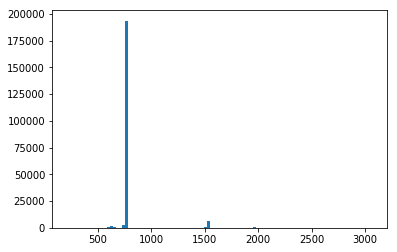

In [61]:
plt.hist([x.length for x in fastq.sequences], bins=100)